yangın katları için ayrı yap
yangın katlarının üzerindekileri birleştirerek yap

In [1]:
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
data = pd.read_excel('DATA SON SPSS.xlsx', skiprows=2)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.columns = ['label', 'scenario', 'building', 'floor', 'fire_h', 'fire_floor', 'fire_spread', 'door_condition',
                'evacuation_delay', 'tenability_1', 'tenability_2', 'FIH', 'FIN']

In [4]:
scn_rp={'Senaryo 1: 0H-1R-Low-Open Door': 'Senaryo 1',
        'Senaryo 2: 0H-3R-Low-Open Door': 'Senaryo 2',
        'Senaryo 3: 0h-1R-Low-Leaky': 'Senaryo 3',
        'Senaryo 4: 0h-3R-Low-Leaky': 'Senaryo 4',
        'Senaryo 5: 0h-1R-Medium-Open': 'Senaryo 5',
        'Senaryo 6:0h-3R-Medium-Open Door': 'Senaryo 6',
        'Senaryo 7:0h-1R-Medium-Leaky': 'Senaryo 7',
        'Senaryo 8: 0h-3R-Medium-Leaky': 'Senaryo 8',
        'Senaryo 9:0h-1R-High-Open': 'Senaryo 9',
        'Senaryo 10: 0H-3R-High-Open Door': 'Senaryo 10',
        'Senaryo 11: 0h-1R-High-Leaky': 'Senaryo 11',
        'Senaryo 12: 0h-3R-High-Leaky': 'Senaryo 12',
        'Senaryo 13: 0.25H-1R-Low-Open Door': 'Senaryo 13',
        'Senaryo 14: 0.25H-3R-Low-Open Door': 'Senaryo 14',
        'Senaryo 15: 0.25h-1R-Low-Leaky': 'Senaryo 15',
        'Senaryo 16: 0.25h-3R-Low-Leaky': 'Senaryo 16',
        'Senaryo 17: 0.25h-1R-Medium-Open': 'Senaryo 17',
        'Senaryo 18:0.25h-3R-Medium-Open Door': 'Senaryo 18',
        'Senaryo 19:0.25h-1R-Medium-Leaky': 'Senaryo 19',
        'Senaryo 20: 0.25h-3R-Medium-Leaky': 'Senaryo 20',
        'Senaryo 21:0.25h-1R-High-Open': 'Senaryo 21',
        'Senaryo 22: 0.25H-3R-High-Open Door': 'Senaryo 22',
        'Senaryo 23: 0.25h-1R-High-Leaky': 'Senaryo 23',
        'Senaryo 24: 0.25h-3R-High-Leaky': 'Senaryo 24',
        'Senaryo 25: 0.5H-1R-Low-Open Door': 'Senaryo 25',
        'Senaryo 26: 0.5H-3R-Low-Open Door': 'Senaryo 26',
        'Senaryo 27: 0.5h-1R-Low-Leaky': 'Senaryo 27',
        'Senaryo 28: 0.5h-3R-Low-Leaky': 'Senaryo 28',
        'Senaryo 29: 0.5h-1R-Medium-Open': 'Senaryo 29',
        'Senaryo 30:0.5h-3R-Medium-Open Door': 'Senaryo 30',
        'Senaryo 31:0.5h-1R-Medium-Leaky': 'Senaryo 31',
        'Senaryo 32: 0.5h-3R-Medium-Leaky': 'Senaryo 32',
        'Senaryo 33:0.5h-1R-High-Open': 'Senaryo 33',
        'Senaryo 34: 0.5H-3R-High-Open Door': 'Senaryo 34',
        'Senaryo 35: 0.5h-1R-High-Leaky': 'Senaryo 35',
        'Senaryo 36: 0.5h-3R-High-Leaky': 'Senaryo 36',
        'Senaryo 37: 0.75H-1R-Low-Open Door': 'Senaryo 37',
        'Senaryo 38: 0.75H-3R-Low-Open Door': 'Senaryo 38',
        'Senaryo 39: 0.75h-1R-Low-Leaky': 'Senaryo 39',
        'Senaryo 40: 0.75h-3R-Low-Leaky': 'Senaryo 40',
        'Senaryo 41: 0.75h-1R-Medium-Open': 'Senaryo 41',
        'Senaryo 42:0.75h-3R-Medium-Open Door': 'Senaryo 42',
        'Senaryo 43:0.75h-1R-Medium-Leaky': 'Senaryo 43',
        'Senaryo 44: 0.75h-3R-Medium-Leaky': 'Senaryo 44',
        'Senaryo 45:0.75h-1R-High-Open': 'Senaryo 45',
        'Senaryo 46: 0.75H-3R-High-Open Door': 'Senaryo 46',
        'Senaryo 47: 0.75h-1R-High-Leaky': 'Senaryo 47',
        'Senaryo 48: 0.75h-3R-High-Leaky': 'Senaryo 48'}

In [5]:
data['scenario'] = data['scenario'].replace(scn_rp)

In [6]:
data.head(3)

label   scenario  building  floor fire_h  fire_floor fire_spread  \
0      1  Senaryo 1         1      1     0h           1          1R   
1      2  Senaryo 1         1      1     0h           1          1R   
2      3  Senaryo 1         1      1     0h           1          1R   

  door_condition evacuation_delay  tenability_1  tenability_2   FIH  FIN  
0           Open              Low             3             3  0.00  0.0  
1           Open              Low             3             3  0.05  0.0  
2           Open              Low             3             3  0.38  0.0

In [7]:
fire_floors = {1:[1,10,19,34],
               2:[1,5,9,14],
               3:[1,6,12,18],
               4:[1,8,15,23],
               5:[1,5,10,16]}

In [8]:
dist_list =  [
 'norm',
 'alpha',
 'beta',
 'chi2',
 'cosine',
 'expon',
 'exponnorm',
 'f',
 'weibull_min',
 'weibull_max',
 'gamma',
 'erlang',
 'levy',
 'logistic',
 'loggamma',
 'lognorm',
 'maxwell',
 't',
 'pearson3',
 'loguniform',
 'skewnorm',
 'triang',
 'tukeylambda',
 'uniform',]

In [9]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    if len(params)>=2:
        loc = params[-2]
    else:
        loc = 0
    scale = params[-1]
    dist = getattr(st, dist)
    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [10]:
def get_best_distribution(data):
        
    dist_results = []
    params = {}
    
    for distribution in dist_list:
        dist = getattr(st, distribution)
        param = dist.fit(data)
        
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, distribution, args=param)
        '''
        s, c, sig = st.anderson(data, dist=distribution)
        if sum(s<cv)>0:
            and_res = 'accepted'
        else:
            and_res = 'rejected'
        '''
        dist_results.append((distribution, param, p))
    best_dist, best_params, best_p = (max(dist_results, key=lambda item: item[2]))
    return best_dist, best_params, best_p

In [11]:
intervals = pd.read_excel('intervals.xlsx', sheet_name='Sheet2')

In [12]:
def get_building_data(row):
    all_samples = []
    print('-'*30)
    
    for i in row.items():
        if type(i[1]) == str:
            building = i[0]
            start, end = eval(i[1])
            print(building, ' - ', start, end)            
            sample = data.loc[(data['building']==building)&(data['floor']>=start)&(data['floor']<=end), 'FIH']
            all_samples.extend(sample)
    return np.array(all_samples)

In [13]:
oversample_data = {}
for idx, row in intervals.iterrows():
    oversample_data[idx] = get_building_data(row)

------------------------------
1  -  2 6
2  -  2 6
3  -  2 6
4  -  2 6
Unnamed: 5  -  2 6
------------------------------
1  -  7 11
2  -  7 11
3  -  7 11
4  -  7 11
Unnamed: 5  -  7 11
------------------------------
1  -  12 16
2  -  12 16
3  -  12 16
4  -  12 16
Unnamed: 5  -  12 16
------------------------------
1  -  17 21
2  -  17 19
3  -  17 21
4  -  17 21
Unnamed: 5  -  17 21
------------------------------
1  -  22 26
3  -  22 24
4  -  22 26
------------------------------
1  -  27 31
4  -  27 31
------------------------------
1  -  32 36
------------------------------
1  -  37 41
------------------------------
1  -  42 45
------------------------------
1  -  11 15
2  -  6 10
3  -  7 11
4  -  9 13
Unnamed: 5  -  6 10
------------------------------
1  -  16 20
2  -  11 15
3  -  12 16
4  -  14 18
Unnamed: 5  -  11 15
------------------------------
1  -  21 25
2  -  16 19
3  -  17 21
4  -  19 23
Unnamed: 5  -  16 21
------------------------------
1  -  26 30
3  -  22 24
4  -  24 28
-

In [14]:
import ray
ray.init()

2022-05-15 17:42:04,408	INFO services.py:1171 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.0.11',
 'raylet_ip_address': '192.168.0.11',
 'redis_address': '192.168.0.11:6379',
 'object_store_address': 'tcp://127.0.0.1:63608',
 'raylet_socket_name': 'tcp://127.0.0.1:63764',
 'webui_url': '127.0.0.1:8265',
 'session_dir': 'C:\\Users\\ISMAIL~1\\AppData\\Local\\Temp\\ray\\session_2022-05-15_17-42-03_104585_17204',
 'metrics_export_port': 64822,
 'node_id': '5d898f12c36195d72de0037076d9d98bce2fc748'}

In [15]:
@ray.remote
def run(idx, sample):
    try:
        res = get_best_distribution(sample)
    except:
        print('An error occuered with ', idx)
        return ()
    return res

In [16]:
futures = [run.remote(idx, sample) for idx, sample in oversample_data.items()]
results = ray.get(futures)

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
(pid=15444)   Lhat = muhat - Shat*mu
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
(pid=18272)   Lhat = muhat - Shat*mu
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
(pid=4004)   Lhat = muhat - Shat*mu
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
(pid=12556)   Lhat = muhat - Shat*mu
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
(pid=15444)   sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
(pi

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 17.31280320413283.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.044466679877306.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.920650045332543.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.515342062190598.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anacon

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5080263590273215.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5093024532617645.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5083818980354451.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5095881665331972.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaco

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5039551157635308.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.503955155935753.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5039551280873533.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5039551494537663.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anacon

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 63.680631703184275.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 64.4923024459467.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 64.45283825382933.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.49547810683772.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 33.44349681209539.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 32.394633779446735.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 31.64109770308262.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 32.2276551746461.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.494254159272291.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.611264038669233.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.372943053452694.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.457375151286193.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 13.65.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 13.433333333333334.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 13.108333333333334.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 13.505555555555556.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages

(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.39031238778091515.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6282657634366524.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.46963017966616083.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5886068674940295.
(pid=3752)   warnings.warn(
(pid=3752)

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3092325740612668.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3092316611569529.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.30921997538413937.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3092344091184569.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib

(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4748240678621778.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4937362599650188.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41970830201418763.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.33801354239934867.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Ana

(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0002777777777777778.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00041666666666666664.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\

(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.20657315728406003.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.20608167968797617.
(pid=12556)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0072719831795342495.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007273859095491988.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramDat

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007238609503313806.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007240070703975284.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007238974803479175.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007239705403809914.
(pid=18272)   warnings.warn(
(pid=4004) C:\ProgramDat

(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007173480769379066.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0071843284121550915.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007183881081569345.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007181163585439434.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramD

(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.20581027631402452.
(pid=12556)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007263376268105791.
(pid=18040)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978811888.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978879127.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Ana

(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0072562513595428035.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00725625500695924.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256248592409446.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256255195644268.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramDa

(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300740440859.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300530798404.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300797744971.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300969373734.
(pid=15092)   warnings.w

(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0072633832242051735.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007263383224420146.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007263383225219856.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0072633832259026195.
(pid=18040)   warnings.warn(
(pid=18040) C:\Program

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978903325.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978825182.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978807166.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978852227.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramDa

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978839454.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978839534.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00725630097883947.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.007256300978839524.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramDat

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
(pid=15444)   return log(self._pdf(x, *args))
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
(pid=16212)   return log(self._pdf(x, *args))
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
(pid=3752)   return log(self._pdf(x, *args))
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
(pid=15092)   return log(self._pdf(x, *args))
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:8352: RuntimeWarning: divide by zero encountered in power
(pid=15092)   Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)
(pid=18272) C:

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.13983414941321404.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17766838566058357.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.2347724620699133.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.19670307779702684.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\An

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11168136413984997.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11168024741944028.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11167705848547876.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11167200835083443.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\A

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11168033033226696.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.1116803274037648.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.11168033).
(pid=15444)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
(pid=16212)   improvement from the last five Jacobian evaluations.
(pid=16212)   warnings.warn(msg, RuntimeWa

(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5357170246686622.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5398045185859343.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5472234605970114.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422774992562933.
(pid=16212)   warnings.warn(
(pi

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422158096368449.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422124628764393.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.542215079320196.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422121178299434.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anacon

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422008625219736.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422008926591277.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422008818970182.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422008793147615.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaco

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422009488473041.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422009588203422.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422009649176496.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5422009632474576.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaco

(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
(pid=12556)   sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.2.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.133333333333333.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.1.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41477065535655633.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41437466599792794.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41306254642312745.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41546866756600775.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\A

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.415744845424291.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4157448768925188.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41574479058887726.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41574488471277876.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anac

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4157447338764399.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.415744734110363.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4157447340782795.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4157447344360678.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anacon

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4157447340616105.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4157447340615865.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41574473406162726.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4157447340615855.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anac

(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41878904957655205.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41434821202513983.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41730877039274794.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41508835161704183.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\A

(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.2173756720657649.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.20455673571009747.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.21310269328054243.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.2066932251027087.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Ana

(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17800219964508285.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17757810221551895.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17803731480458113.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17837686429979066.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\A

(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.1780219622819847.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17802196884914526.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.1780219670899147.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17802196723084318.
(pid=12556)   warnings.warn(
(pid=12556) C:\ProgramData\Ana

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.5.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.333333333333332.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.083333333333332.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.38888888888889.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\s

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.905195356006963.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.7957799547878093.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9559570151354315.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9935168852785077.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\s

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8293548646569251.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8378933267275116.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8648985777631171.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8359191242312951.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\

(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.22402542320517432.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.24069605563517404.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.2447360098221969.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.2048797366947701.
(pid=3752)   warnings.warn(
(pid=3752)

(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 20.5.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 20.333333333333336.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 20.083333333333336.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 20.388888888888893.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17814066096711878.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17814023161184617.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.1781405448857874.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.1781402977636397.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\li

(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11403809088701163.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11480117805613069.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11431466328559994.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11407806890299915.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\A

(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11404758423305894.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.1140473639283166.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11404790770855322.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.11404808431421928.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\An

(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 27.3.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 24.7.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 26.65.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 26.433333333333337.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_conti

(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.996423322858632.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.839954713187597.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.366252124134828.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 11.433062916460656.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaco

(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6516777864473957.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6797591496646006.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6465594874270787.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6779746731469435.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaco

(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6167636190894139.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6177887235545307.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.617624310913528.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6175140747431962.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anacon

(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6162428403297027.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6161420979997121.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6161380488554142.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6161731305275688.
(pid=15092)   warnings.warn(
(pid=15092) C:\ProgramData\Anaco

(pid=15092) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.61617156).
(pid=15092)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 122.85000000000001.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 111.14999999999999.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 113.1.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-package

(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.61676183024667.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.11499957607356.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 59.87439676874823.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 59.8086880183953.
(pid=18272)   warnings.warn(
(pid=182

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 27.125498622389316.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 28.291163196484497.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 26.72194877434455.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 26.470910352635045.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anacon

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.992398190596614.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.252450239702657.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.188479456819433.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.480048480017473.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3

(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.1940924704540468.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8827025349173114.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.3215360011378148.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0289803569908127.
(pid=4004)   warnings.warn(
(pid=4004) C

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6540486856373187.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6537846685243438.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.653810169444606.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6543340042775386.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anacon

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6538779316130405.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6538806639249115.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6538781434522332.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6538801768326732.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaco

(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.8.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.2.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.4.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.266666666666666.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_contin

(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.7353001693218877.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.7372284283685877.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.7305095293643686.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.7015010867522142.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaco

(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.43597335087076605.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4383732766307499.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4354542469899243.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4365350936157386.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anac

(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4357687687244466.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.43576963073522085.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4357688211114299.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4357695340567468.
(pid=18040)   warnings.warn(
(pid=18040) C:\ProgramData\Anac

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.700000000000001.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.466666666666669.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.116666666666667.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.544444444444448.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaco

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8366157158387497.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8563950163787248.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8418599566547709.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8533682381615231.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaco

(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430991249662692.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430953664387801.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8431000946813298.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430996446165895.
(pid=16212)   warnings.warn(
(pi

(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430980625713186.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430980629366653.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430980625627669.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430980622442168.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaco

(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430980627852354.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430980627734397.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430980627841209.
(pid=16212)   warnings.warn(
(pid=16212) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8430980627751428.
(pid=16212)   warnings.warn(
(pi

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
(pid=15444)   improvement from the last ten iterations.
(pid=15444)   warnings.warn(msg, RuntimeWarning)
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 27.3.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 24.7.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 26.65.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packag

(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.0526035181204865.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.470118224232152.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.579407175890054.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.0542447819871175.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\si

(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.2463521651060026.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.2463170400205172.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.24635509427904378.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.246334606728428.
(pid=4004)   warnings.warn(
(pid=4004) C:\ProgramData\Anaconda3\lib\

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 367.5.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 332.5.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 341.25.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 344.16666666666663.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_co

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 262.84700317612294.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 263.6560682112246.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 261.5469435935492.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 260.0214569064293.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda

(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 226.26285967159777.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 219.95277287757602.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 219.78850149128476.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 218.39506702344738.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaco

(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 146.2772145155702.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 144.53413892959583.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 147.66173008476866.
(pid=18272)   warnings.warn(
(pid=18272) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 148.6957940610854.
(pid=18272)   warnings.warn(
(pid=

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.600000000000001.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.400000000000002.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.100000000000001.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.466666666666669.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaco

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.44376043149307653.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.44704655780262115.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4445819630704627.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.44622502622523497.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\An

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3200171176018713.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3194336052475802.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3196577779036779.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.31890942996929034.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anac

(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3190259790068657.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.31901051254760315.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.31902758612517434.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.31901888227064124.
(pid=15444)   warnings.warn(
(pid=15444) C:\ProgramData\An

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 33.6.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 30.4.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 31.2.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 31.46666666666667.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distn

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.846538225759586.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.0194400055690815.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.70015520139064.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.662146774782581.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5298162340754767.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5311993655127264.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5301620169347891.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.530853582653414.
(pid=3752)   warnings.warn(
(pid=3752) C:\ProgramData\Anaconda3\lib\s

(pid=3752) C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2804: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.52478062).
(pid=3752)   warnings.warn(


In [17]:
results

[('norm', (0.014095886752136752, 0.11055463027759731), 0.0),
 ('norm', (0.05697783970276008, 0.22089695443141377), 0.0),
 ('norm', (0.13378286014721344, 0.3296101737283879), 0.0),
 ('norm', (0.2624387254901961, 0.4279581026050374), 0.0),
 ('norm', (0.37074896694214876, 0.4716432869769779), 0.0),
 ('norm', (0.4535361552028218, 0.48653001906478366), 0.0),
 ('norm', (0.43227207977207976, 0.48018181360891393), 0.0),
 ('norm', (0.34737755847953217, 0.45404997453960844), 0.0),
 ('norm', (0.3960459183673469, 0.46716908103218463), 0.0),
 ('norm', (0.06865251068376069, 0.24336115813670148), 0.0),
 ('norm', (0.16808165113871634, 0.3614362042190228), 0.0),
 ('norm', (0.295728515625, 0.4447810094285922), 0.0),
 ('norm', (0.43917100694444444, 0.4854284318241893), 0.0),
 ('norm', (0.4559722222222223, 0.4840009557369913), 0.0),
 ('norm', (0.38530153508771936, 0.46961107120616086), 0.0),
 ('norm', (0.37939378415300545, 0.4612561082447117), 0.0),
 ('norm', (0.1972000773993808, 0.3865851625916475), 0.0)

fit_results = {}
for idx, sample in oversample_data.items():
    
    best_dist, best_params, best_p = get_best_distribution(sample)
    fit_results[idx] = (best_dist, best_params, best_p)
    

In [20]:
fit_results = dict(zip(oversample_data.keys(), results))

----------------------------------------------------------------------
0  -  norm  -  0.0


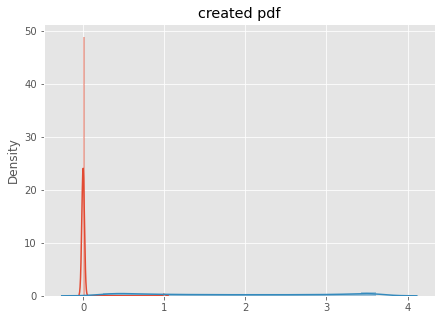

----------------------------------------------------------------------
1  -  norm  -  0.0


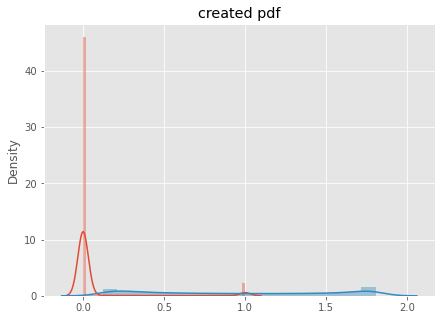

----------------------------------------------------------------------
2  -  norm  -  0.0


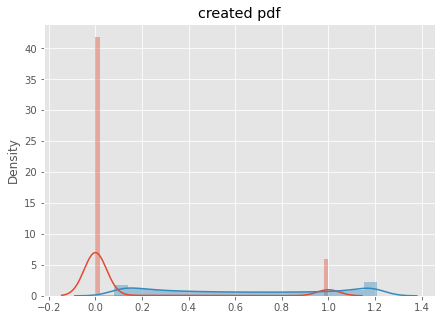

----------------------------------------------------------------------
3  -  norm  -  0.0


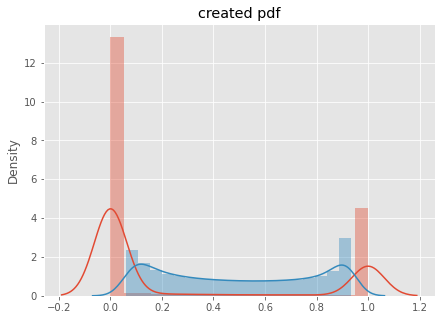

----------------------------------------------------------------------
4  -  norm  -  0.0


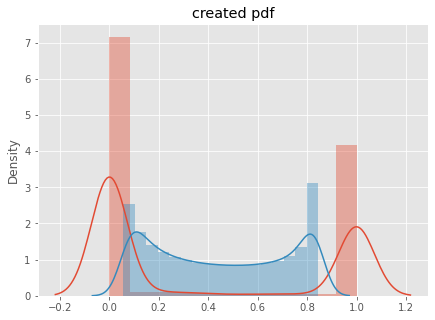

----------------------------------------------------------------------
5  -  norm  -  0.0


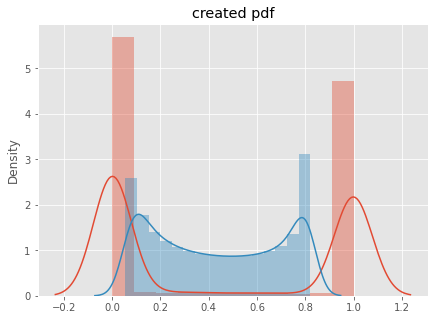

----------------------------------------------------------------------
6  -  norm  -  0.0


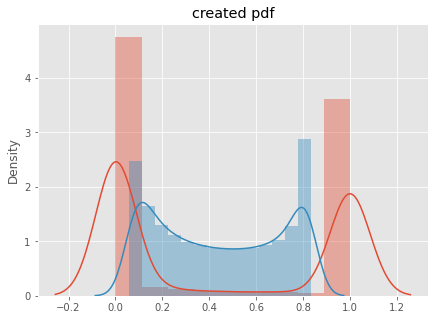

----------------------------------------------------------------------
7  -  norm  -  0.0


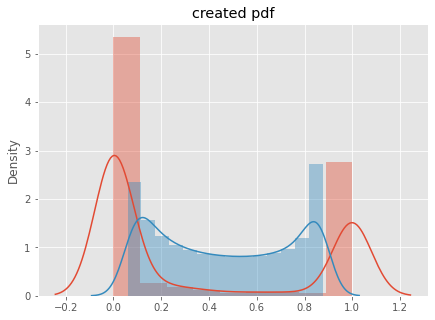

----------------------------------------------------------------------
8  -  norm  -  0.0


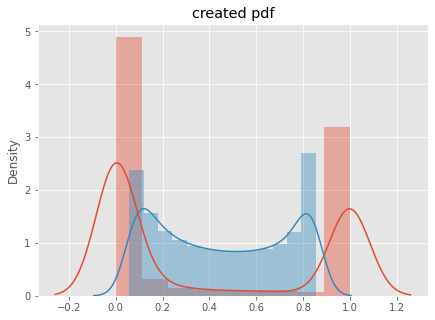

----------------------------------------------------------------------
9  -  norm  -  0.0


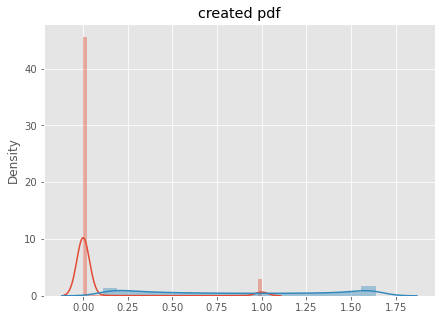

----------------------------------------------------------------------
10  -  norm  -  0.0


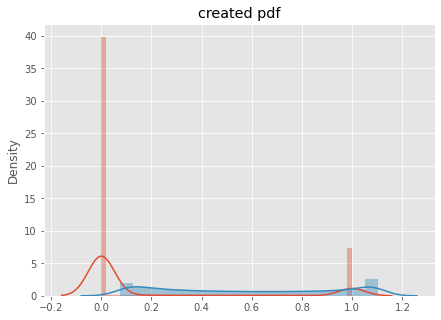

----------------------------------------------------------------------
11  -  norm  -  0.0


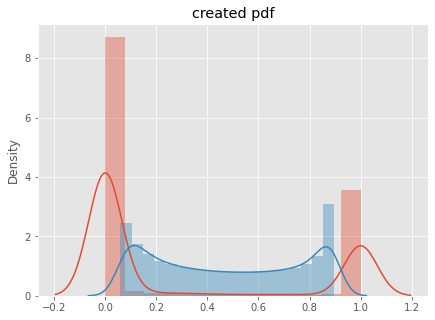

----------------------------------------------------------------------
12  -  norm  -  0.0


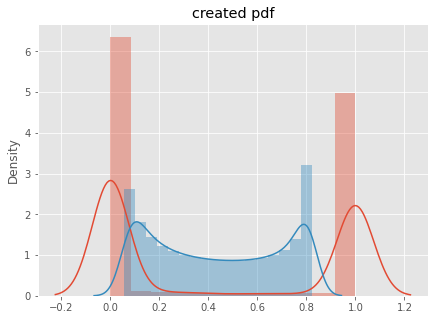

----------------------------------------------------------------------
13  -  norm  -  0.0


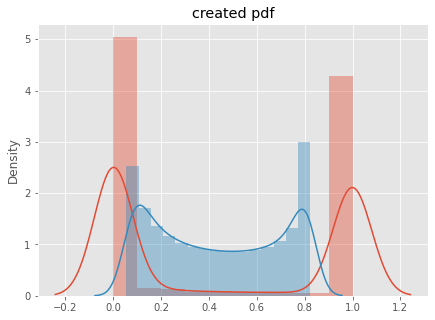

----------------------------------------------------------------------
14  -  norm  -  0.0


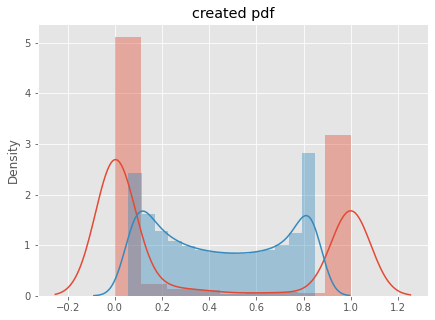

----------------------------------------------------------------------
15  -  norm  -  0.0


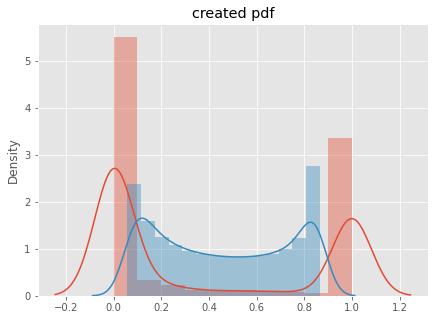

----------------------------------------------------------------------
16  -  norm  -  0.0


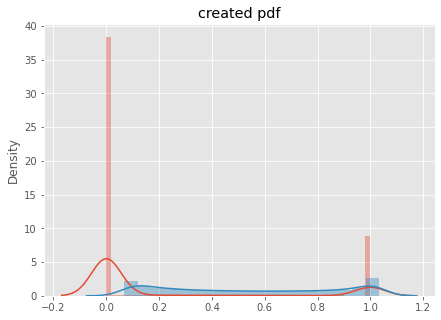

----------------------------------------------------------------------
17  -  norm  -  0.0


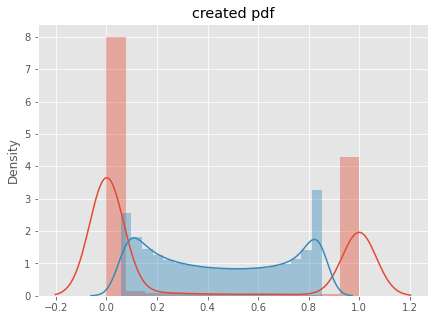

----------------------------------------------------------------------
18  -  norm  -  0.0


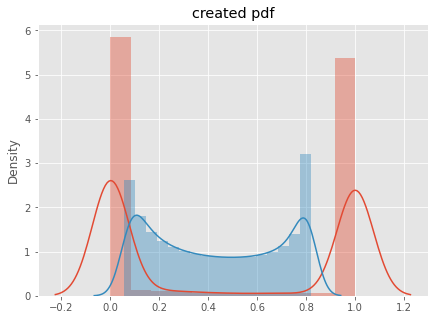

----------------------------------------------------------------------
19  -  norm  -  0.0


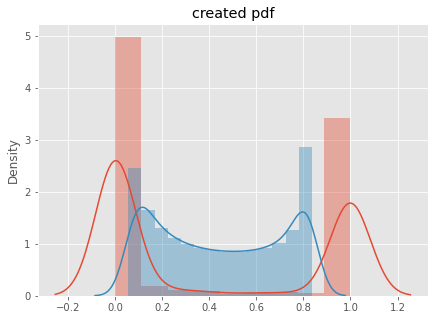

----------------------------------------------------------------------
20  -  norm  -  0.0


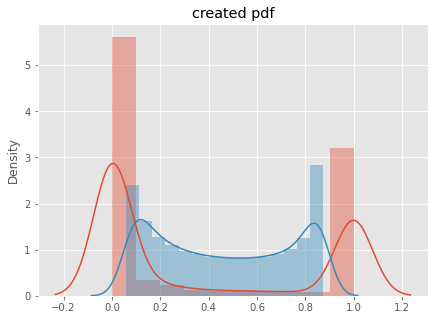

----------------------------------------------------------------------
21  -  norm  -  0.0


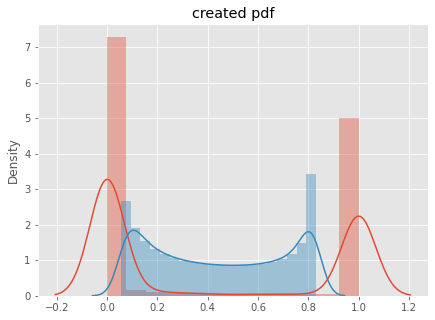

----------------------------------------------------------------------
22  -  norm  -  0.0


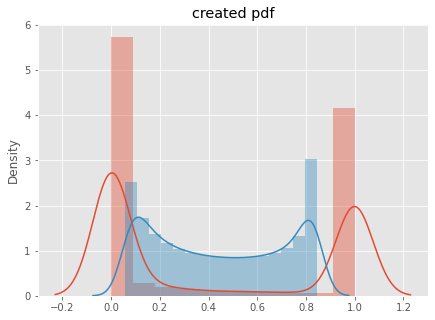

In [24]:
for idx, sample in oversample_data.items():
    
    best_dist, best_params, best_p = fit_results[idx]
    
    print('-'*70)
    print(idx, ' - ', best_dist, ' - ', best_p)
    best_dist, best_params, best_p
    plt.figure(2*idx, figsize=(7,5))
    plt.title('real sample')
    sns.distplot(sample)
    
    pdf = make_pdf(best_dist, best_params, size=len(sample))
    plt.title('created pdf')
    sns.distplot(pdf)
    plt.show()

In [ ]:
res = get_best_distribution(sample)

In [ ]:
res_df = pd.DataFrame(res)
res_df.sort_values(by=2, ascending=False).head(10)

In [ ]:
dist, params = res_df.sort_values(by=2, ascending=False).head(1)[0], res_df.sort_values(by=2, ascending=False).head(1)[1] 
pdf = make_pdf('loggamma', res_df.loc[29,1], size=10000)

In [ ]:
pdf.plot(kind='hist', bins=20)

In [ ]:
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All Fitted Distributions')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

print(time.time() - t1)

In [ ]:
sns.distplot(data['FIH']).set(title='Distribution for FIH')

In [ ]:
sns.distplot(data['FIN']).set(title='Distribution for FIN')

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1        
https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

In [ ]:
i = 0
all_scenarios = data['scenario'].unique()

for building, ffloors in fire_floors.items():
    
    max_building_floor = data[data['building']==building]['floor'].max()
        
    for ff in ffloors:
        f_start = ff+1
        while f_start < max_building_floor:
            f_end = f_start+4
            if max_building_floor - f_end < 2:
                f_end = max_building_floor
            
            for scen in all_scenarios:
                
                sample = data.loc[(data['scenario']==scen)&(data['building']==building)&(data['floor']>=f_start)&(data['floor']<=f_end), 'FIH']
                
                plt.figure(i)          
                sns.distplot(sample)
                i += 1
            f_start += 5

In [ ]:
sns.distplot(sample)

In [ ]:
intervals = pd.read_excel('intervals.xlsx', 'Sheet2')

In [ ]:
def get_best_distribution_v1(data):
    dist_names = dist_list
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        # print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]